In [1]:
import pickle
from itertools import product
from pathlib import Path
from random import choices

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import seaborn as sns

import sys
sys.path.append("../")
from src.eval.utils import *
from src.eval.study import Study
from src.eval.episode import Episode
from src.eval.study_utils import plot_best_mae_over_time, plot_mae_over_time

In [2]:
es_default_sim = Study.load("../data/bo_vs_rl/simulation/es_default", name="ES (default, simulation)")
es_decay_sim = Study.load("../data/bo_vs_rl/simulation/es_with_decay", name="ES (with decay, simulation)")
es_tuned_sim = Study.load("../data/bo_vs_rl/simulation/es_tuned", name="ES (tuned, simulation)")
bo_hard = Study.load("../data/bo_vs_rl/simulation/bo_hard", name="BO (hard, simulation)")
bo_proximal = Study.load("../data/bo_vs_rl/simulation/bo_proximal", name="BO (proximal, simulation)")
paper_studies = [es_default_sim, es_decay_sim, es_tuned_sim, bo_hard, bo_proximal]
FIG_DIR = "../figures/new_optimizers"

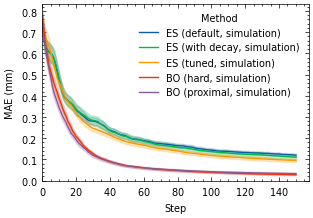

In [3]:
plot_best_mae_over_time(
    paper_studies,
    threshold=None,
    title=None,
    figsize=(510 / 72.72 * 0.49, 510 / 72.72 * 0.49 * 2 / 3),
    study_name_str="Method",
    save_path=f"{FIG_DIR}/best_mae_over_time.pdf",
)

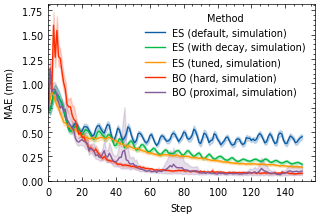

In [4]:
plot_mae_over_time(
    paper_studies,
    threshold=None,
    title=None,
    figsize=(510 / 72.72 * 0.49, 510 / 72.72 * 0.49 * 2 / 3),
    study_name_str="Method",
    save_path=f"{FIG_DIR}/mae_over_time.pdf",
)

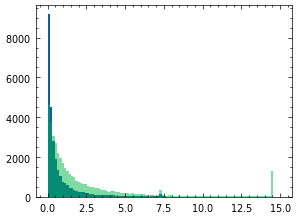

In [37]:
k1s_hard = np.array([np.array(episode.actions)[:,0] for episode in bo_hard.episodes])
d_k1s_hard = np.diff(k1s_hard)

k1s_proximal = np.array([np.array(episode.actions)[:,0] for episode in bo_proximal.episodes])
d_k1s_proximal = np.diff(k1s_proximal)
plt.hist(np.abs(d_k1s_proximal.flatten()),bins=100, range=[0,15], label="Proximal");
plt.hist(np.abs(d_k1s_hard.flatten()), bins=100,alpha=0.5,range=[0,15], label="Hard");
# d_k1 = np.diff(actions)
# plt.hist(d_k1, bins=100)

In [35]:
d_k1s_proximal.max()

40.49599671567691